In [0]:
import pandas as pd 
import plotly.express as px
import folium
import numpy as np
import plotly.graph_objs as go
from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop, Adam
from statsmodels.tsa.arima_model import ARIMA     
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from pylab import rcParams
plt.style.use('fivethirtyeight') 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [71]:
data = pd.read_csv("covid_19_clean_complete.csv")
data.head()

Province/State Country/Region      Lat  ...  Confirmed Deaths  Recovered
0            NaN    Afghanistan  33.0000  ...          0      0          0
1            NaN        Albania  41.1533  ...          0      0          0
2            NaN        Algeria  28.0339  ...          0      0          0
3            NaN        Andorra  42.5063  ...          0      0          0
4            NaN         Angola -11.2027  ...          0      0          0

[5 rows x 8 columns]

# **Analyse**

In [72]:
data2=pd.DataFrame();
data2["Country"] = list(data.groupby("Country/Region").sum().index)
data2["Confirmed"] = list(data.groupby("Country/Region")["Confirmed"].max())
data2["Deaths"] = list(data.groupby("Country/Region")["Deaths"].max())
data2["Recovered"] = list(data.groupby("Country/Region")["Recovered"].max())
data2["Lat"] = list(data.groupby("Country/Region")["Lat"].max())
data2["Long"] = list(data.groupby("Country/Region")["Long"].max())
data2.sort_values('Confirmed', ascending=False).reset_index()[["Country", "Confirmed", "Deaths", "Recovered"]].style.background_gradient(cmap='Reds')

In [73]:
fig = px.bar(data2, x="Country", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed cases in each country', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [74]:
fig = px.bar(data2, x="Country", y="Deaths", color='Deaths', orientation='v', height=600,
             title='Deaths in each country', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [75]:
fig = px.bar(data2, x="Country", y="Recovered", color='Recovered', orientation='v', height=600,
             title='Recovered cases in each country', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [94]:
def prepare_data_to_plot(column_name):
  confirmed_count = list(data.groupby("Date")[column_name].sum())
  for i in range(1, len(confirmed_count)):
    if(confirmed_count[i]<confirmed_count[i-1]):
      confirmed_count[i] = confirmed_count[i-1]


  l1 = []
  for i in range(0, len(confirmed_count)-1):
      if (confirmed_count[i]!=confirmed_count[i+1]):
        s = confirmed_count[i+1] - confirmed_count[i]
        l1.append(s)
      else:
        l1.append(s)

  l1.append(confirmed_count[len(confirmed_count)-1])

  date = list(data["Date"])
  l2 = [date[0]]
  for i in range(1, len(date)):
    if(date[i]!=date[i-1]):
      l2.append(date[i])


  each_day = pd.DataFrame()

  each_day["Day"] = l2[:-8]
  each_day[column_name] = l1[:-8]

  return each_day

each_day_confirmed = prepare_data_to_plot("Confirmed")
each_day_death = prepare_data_to_plot("Deaths")
each_day_recovered = prepare_data_to_plot("Recovered")

fig1 = px.bar(each_day_confirmed[(each_day_confirmed["Day"]!="4/1/20") & (each_day_confirmed["Day"]!="5/1/20")], x="Day", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed cases each day', color_discrete_sequence = px.colors.cyclical.mygbm)

fig2 = px.bar(each_day_death[(each_day_death["Day"]!="4/1/20") & (each_day_death["Day"]!="5/1/20")], x="Day", y="Deaths", color='Deaths', orientation='v', height=600,
             title='Deaths each day', color_discrete_sequence = px.colors.cyclical.mygbm)

fig3 = px.bar(each_day_recovered[(each_day_recovered["Day"]!="4/1/20") & (each_day_recovered["Day"]!="5/1/20") & (each_day_recovered["Day"]!="4/24/20") & (each_day_recovered["Day"]!="4/25/20") & (each_day_recovered["Day"]!="4/26/20") & (each_day_recovered["Day"]!="4/27/20") & (each_day_recovered["Day"]!="4/28/20") & (each_day_recovered["Day"]!="4/29/20")], x="Day", y="Recovered", color='Recovered', orientation='v', height=600,
             title='Recovered cases each day', color_discrete_sequence = px.colors.cyclical.mygbm)


fig = make_subplots(rows=1, cols=3, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('Confirmed cases each day', 'Deaths each day', 'Recovered cases each day'))

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=1, col=3)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [97]:
fig = px.choropleth(data, locations="Country/Region", locationmode='country names', color=np.log(data["Confirmed"]), 
                    hover_name="Country/Region", animation_frame=data["Date"], hover_data=['Confirmed'],
                    title='Confirmed cases over time', color_continuous_scale=px.colors.sequential.Purp)
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [111]:
fig1 = px.bar(data, x="Date", y="Confirmed", color='Country/Region', height=600,
             title='Confirmed cases each day for each country', color_discrete_sequence = px.colors.cyclical.mygbm)

fig1.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig1.show()

In [105]:
fig2 = px.bar(data, x="Date", y="Deaths", color='Country/Region', height=600,
             title='Deaths each day for each country', color_discrete_sequence = px.colors.cyclical.mygbm)

fig2.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig2.show()

In [106]:
fig3 = px.bar(data, x="Date", y="Recovered", color='Country/Region', height=600,
             title='Recovered cases each day for each country', color_discrete_sequence = px.colors.cyclical.mygbm)

fig3.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig3.show()

In [11]:
m = folium.Map(location=[33.8869, 10], tiles='cartodbpositron', zoom_start=3)

for i in range(0, len(data2)):
    
    folium.Circle(
        location=[data2.iloc[i]['Lat'], data2.iloc[i]['Long']],
        color='crimson',
        tooltip =   '<li><bold>Country : '+str(data2.iloc[i]['Country'])+
                    '<li><bold>Confirmed : '+str(data2.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(data2.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(data2.iloc[i]['Recovered']),

        radius=int(data2.iloc[i]['Confirmed']**1/2)**1).add_to(m)
    
m

# **Forecast**

In [0]:
def prepare_data(data, country_name):
  confirmed_count = list(data[data["Country/Region"]==country_name]["Confirmed"])
  data_y = (np.asarray(confirmed_count).astype("float32"))
  data_x = np.arange(1,len(data_y)+1)

  return data_y, data_x

def create_model():
  Visible = Input(shape=(1,))
  Dense_l1 = Dense(150,name="Dense_l1")(Visible)
  LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)
  Dense_l2 = Dense(150,name = "Dense_l2")(LRelu_l1)
  LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
  Dense_l3 = Dense(1,name="Dense_l3")(LRelu_l2)
  LRelu_l3 = LeakyReLU(name = "Output")(Dense_l3)
  model = models.Model(inputs=Visible, outputs=LRelu_l3)
  model.compile(optimizer=Adam(lr=0.001), 
                loss='mean_squared_error',
                metrics=['accuracy'])

  return model

def prepare_graph(data, data_y, model, country_name):
  prediction_days = 6
  data2 = (model.predict(np.arange(1,len(data_y)+prediction_days+1))).tolist()
  data3=pd.DataFrame()
  l=[]
  for i in range (len(data2)):
      l.append(int(data2[i][0]))
  l=[0]+l
  data3['case']=l
  data3['day']= list(data[data["Country/Region"]==country_name]["Date"]) + ['Future Day 1', 'Future Day 2', 'Future Day 3', 'Future Day 4', 'Future Day 5', 'Future Day 6', 'Future Day 7']
  
  return data3

## **World**

### Using ARIMA


In [0]:
confirmed_count = list(data.groupby("Date")["Confirmed"].sum())[:-8]
for i in range(1, len(confirmed_count)):
  if(confirmed_count[i]<confirmed_count[i-1]):
    confirmed_count[i] = confirmed_count[i-1]

confirmed_recovered = list(data.groupby("Date")["Recovered"].sum())[:-8]
for i in range(1, len(confirmed_recovered)):
  if(confirmed_recovered[i]<confirmed_recovered[i-1]):
    confirmed_recovered[i] = confirmed_recovered[i-1]

confirmed_deaths = list(data.groupby("Date")["Deaths"].sum())[:-20]
for i in range(1, len(confirmed_deaths)):
  if(confirmed_deaths[i]<confirmed_deaths[i-1]):
    confirmed_deaths[i] = confirmed_deaths[i-1]

data_y = (np.asarray(confirmed_count).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

Text(0.5, 1.0, 'Total confirmed cases in the world forecast')

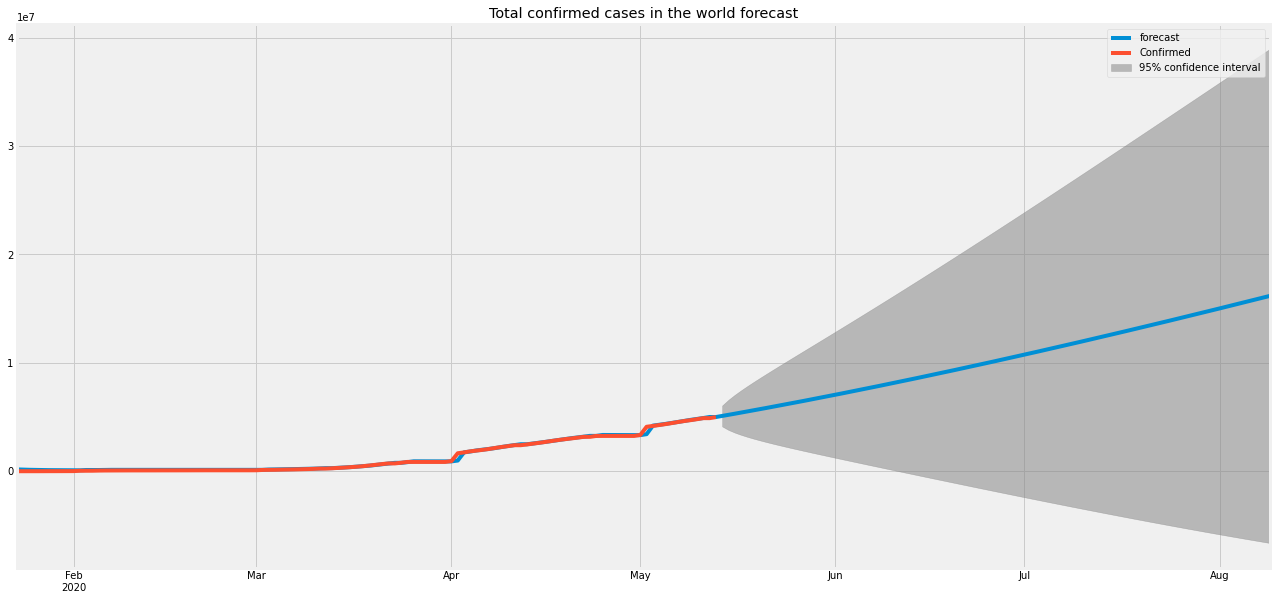

In [148]:
data5 = pd.DataFrame()
data5["Confirmed"] = confirmed_count
data5['Date'] = list(data[data['Country/Region'] == 'US']['Date'])[:-8]
data5['Date'] = pd.to_datetime(data5['Date'])
data5 = data5.set_index('Date')

model = ARIMA(data5, order=(2,1,2))
results1 = model.fit()

rcParams['figure.figsize'] = 20, 10
fig1 = results1.plot_predict(1,200)

plt.title('Total confirmed cases in the world forecast')

Text(0.5, 1.0, 'Total Recovered cases in the world forecast')

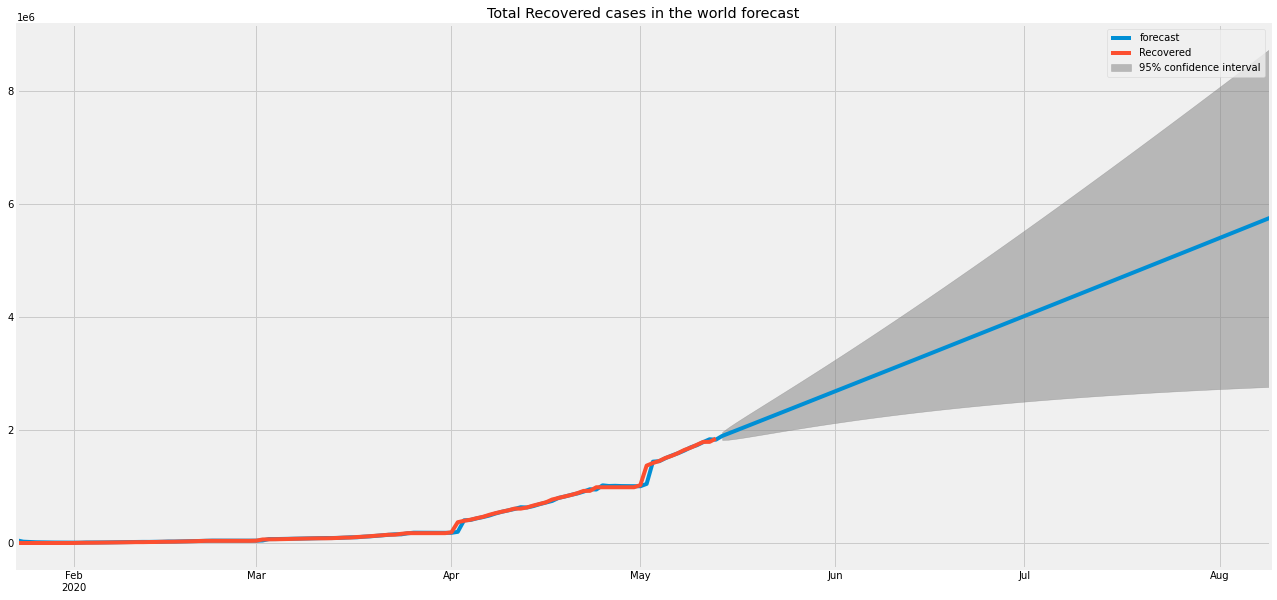

In [156]:

data5 = pd.DataFrame()
data5["Recovered"] = confirmed_recovered
data5['Date'] = list(data[data['Country/Region'] == 'US']['Date'])[:-8]
data5['Date'] = pd.to_datetime(data5['Date'])
data5 = data5.set_index('Date')

model = ARIMA(data5, order=(2,1,2))
results2 = model.fit()

rcParams['figure.figsize'] = 20, 10
fig2 = results2.plot_predict(1,200)

plt.title('Total Recovered cases in the world forecast')

Text(0.5, 1.0, 'Total Deaths in the world forecast')

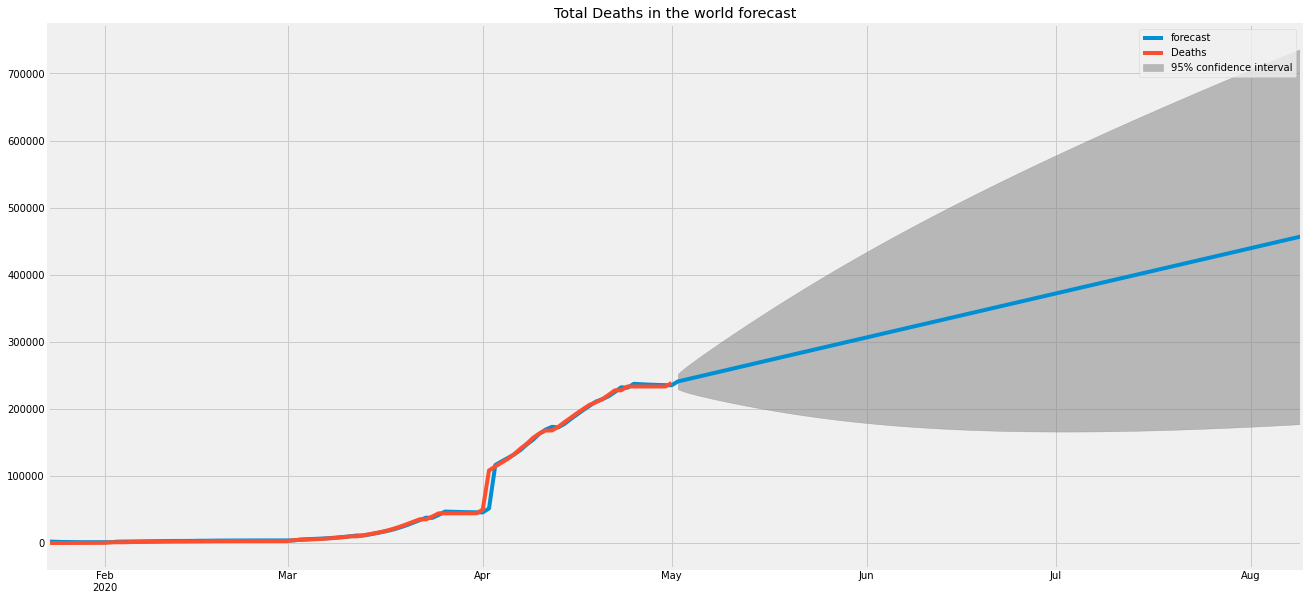

In [150]:
data5 = pd.DataFrame()
data5["Deaths"] = confirmed_deaths
data5['Date'] = list(data[data['Country/Region'] == 'US']['Date'])[:-20]
data5['Date'] = pd.to_datetime(data5['Date'])
data5 = data5.set_index('Date')

model = ARIMA(data5, order=(1,1,1))
results3 = model.fit()

rcParams['figure.figsize'] = 20, 10
fig3 = results3.plot_predict(1,200)

plt.title('Total Deaths in the world forecast')

### Using Neural network

In [0]:
model = create_model()

In [0]:
epochs = 6000
model.fit(data_x.reshape([len(data_x), 1]),data_y.reshape([len(data_x), 1]),epochs=epochs)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
114/114 [==============================] - 0s 108us/step - loss: 551423380857.2632 - accuracy: 0.0000e+00
Epoch 3502/6000
114/114 [==============================] - 0s 130us/step - loss: 550891804564.2106 - accuracy: 0.0000e+00
Epoch 3503/6000
114/114 [==============================] - 0s 108us/step - loss: 550714399187.0878 - accuracy: 0.0000e+00
Epoch 3504/6000
114/114 [==============================] - 0s 105us/step - loss: 550496834039.0176 - accuracy: 0.0000e+00
Epoch 3505/6000
114/114 [==============================] - 0s 86us/step - loss: 550180957417.5438 - accuracy: 0.0000e+00
Epoch 3506/6000
114/114 [==============================] - 0s 89us/step - loss: 550037077728.5614 - accuracy: 0.0000e+00
Epoch 3507/6000
114/114 [==============================] - 0s 87us/step - loss: 549793913299.0878 - accuracy: 0.0000e+00
Epoch 3508/6000
114/114 [==============================] - 0s 102us/step - loss: 549752

In [0]:
model.save('Confirmed_World.h5')
model = models.load_model("Confirmed_World.h5")

country_name = "World"

prediction_days = 6
data2 = (model.predict(np.arange(1,len(data_y)+prediction_days+1))).tolist()
data3=pd.DataFrame()
l=[]
for i in range (len(data2)):
    l.append(int(data2[i][0]))
l=[0]+l
data3['case']=l
data3['day']= list(data.groupby("Date")["Confirmed"].sum().index)[:-7] + ['Future Day 1', 'Future Day 2', 'Future Day 3', 'Future Day 4', 'Future Day 5', 'Future Day 6', 'Future Day 7']

data4 = pd.DataFrame()
data4["day"] = list(data.groupby("Date")["Confirmed"].sum().index)[:-7]
data4["sum"] = confirmed_count

fig = go.Figure()
fig.add_trace(go.Scatter(x=data4["day"], y=data4["sum"],
                         mode='lines+markers',name='Total Cases in ' + country_name))

fig.add_trace(go.Scatter(x=data3['day'], y=data3['case'],
                         name="Prediction",
                        line=dict(color='rgb(220,21,22)',width=2, dash='dot')))

fig.update_layout(title_text="Total confirmed cases prediction in the " + country_name + " for the next 7 days",plot_bgcolor='rgb(250, 242, 242)')

## **Tunisia**

### Using ARIMA

Text(0.5, 1.0, 'Total confirmed cases in Tunisia forecast')

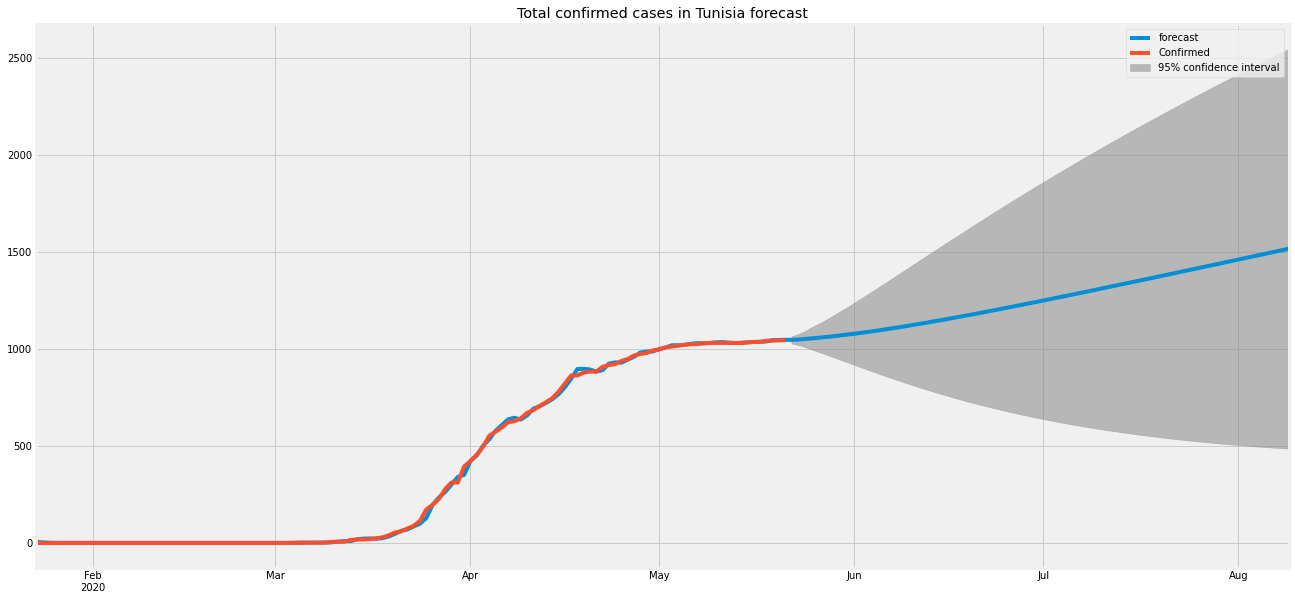

In [0]:
data5 = pd.DataFrame()
data5 = data[data['Country/Region'] == 'Tunisia'][['Confirmed', 'Date']]

data5['Date'] = pd.to_datetime(data5['Date'])
data5 = data5.set_index('Date')

model = ARIMA(data5, order=(3,1,3))
results = model.fit()

rcParams['figure.figsize'] = 20, 10
fig = results.plot_predict(1,200)
plt.title('Total confirmed cases in Tunisia forecast')

Text(0.5, 1.0, 'Total recovered cases in Tunisia forecast')

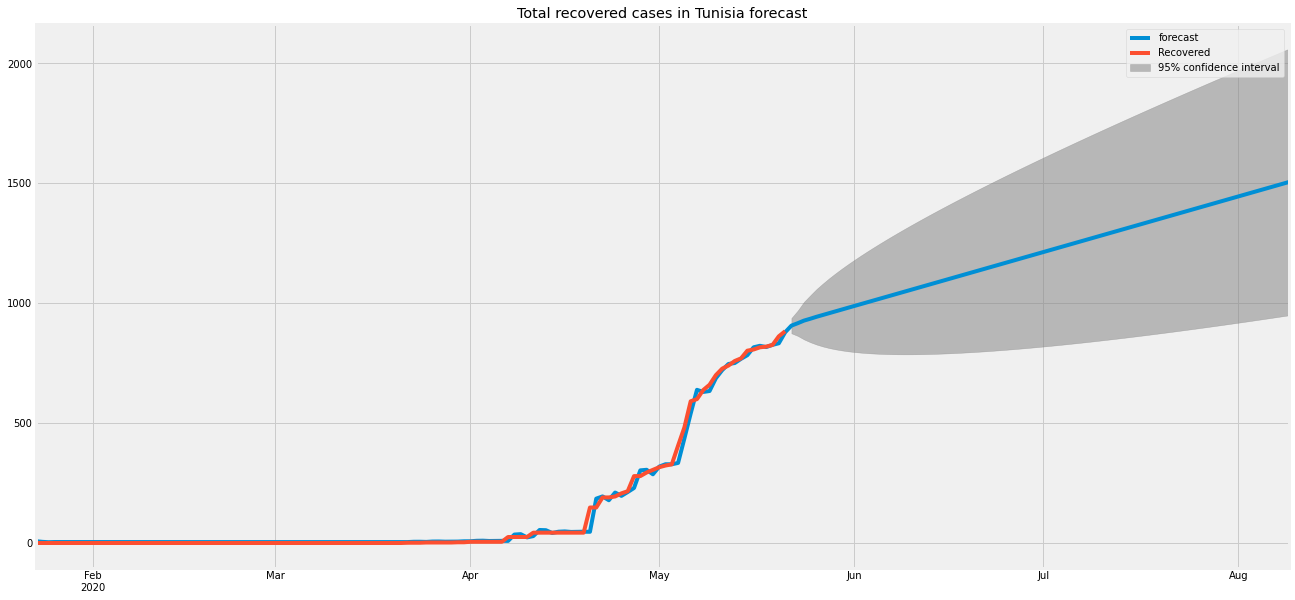

In [152]:
data5 = pd.DataFrame()
data5 = data[data['Country/Region'] == 'Tunisia'][['Recovered', 'Date']]

data5['Date'] = pd.to_datetime(data5['Date'])
data5 = data5.set_index('Date')

model = ARIMA(data5, order=(2,1,2))
results = model.fit()

rcParams['figure.figsize'] = 20, 10
fig = results.plot_predict(1,200)
plt.title('Total recovered cases in Tunisia forecast')

Text(0.5, 1.0, 'Total deaths in Tunisia forecast')

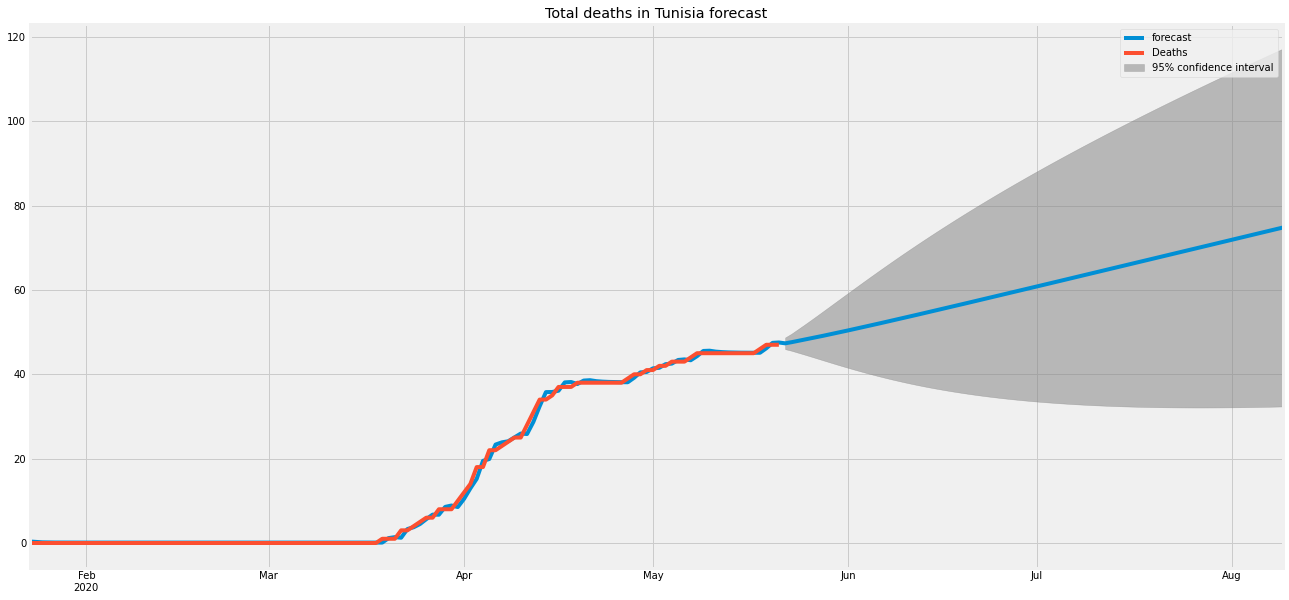

In [153]:
data5 = pd.DataFrame()
data5 = data[data['Country/Region'] == 'Tunisia'][['Deaths', 'Date']]

data5['Date'] = pd.to_datetime(data5['Date'])
data5 = data5.set_index('Date')

model = ARIMA(data5, order=(2,1,2))
results = model.fit()

rcParams['figure.figsize'] = 20, 10
fig = results.plot_predict(1,200)
plt.title('Total deaths in Tunisia forecast')

### Using Neural network

In [0]:
data_y, data_x = prepare_data(data, "Tunisia")
model = create_model()

In [0]:
epochs = 6000
model.fit(data_x.reshape([len(data_x), 1]),data_y.reshape([len(data_x), 1]),epochs=epochs)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
121/121 [==============================] - 0s 106us/step - loss: 102.6049 - accuracy: 0.0661
Epoch 3502/6000
121/121 [==============================] - 0s 100us/step - loss: 106.2965 - accuracy: 0.0909
Epoch 3503/6000
121/121 [==============================] - 0s 105us/step - loss: 101.3449 - accuracy: 0.0826
Epoch 3504/6000
121/121 [==============================] - 0s 86us/step - loss: 59.7059 - accuracy: 0.0579
Epoch 3505/6000
121/121 [==============================] - 0s 98us/step - loss: 87.6252 - accuracy: 0.0413
Epoch 3506/6000
121/121 [==============================] - 0s 107us/step - loss: 109.6409 - accuracy: 0.0661
Epoch 3507/6000
121/121 [==============================] - 0s 128us/step - loss: 98.3610 - accuracy: 0.0992
Epoch 3508/6000
121/121 [==============================] - 0s 98us/step - loss: 71.0672 - accuracy: 0.0331
Epoch 3509/6000
121/121 [==============================] - 0s 96us/step -

In [0]:
model.save('Confirmed_Tunisia.h5')
model = models.load_model("Confirmed_Tunisia.h5")

country_name = "Tunisia"

data3 = prepare_graph(data, data_y, model, country_name)

fig = go.Figure()
fig.add_trace(go.Scatter(x=data[data["Country/Region"]==country_name]["Date"], y=data[data["Country/Region"]==country_name]["Confirmed"],
                         mode='lines+markers',name='Total Cases in ' + country_name))

fig.add_trace(go.Scatter(x=data3['day'], y=data3['case'],
                         name="Prediction",
                        line=dict(color='rgb(220,21,22)',width=2, dash='dot')))

fig.update_layout(title_text="Confirmed cases prediction in the " + country_name + " for the next 7 days",plot_bgcolor='rgb(250, 242, 242)')


## **US**

### Using ARIMA

Text(0.5, 1.0, 'Total confirmed cases in the US forecast')

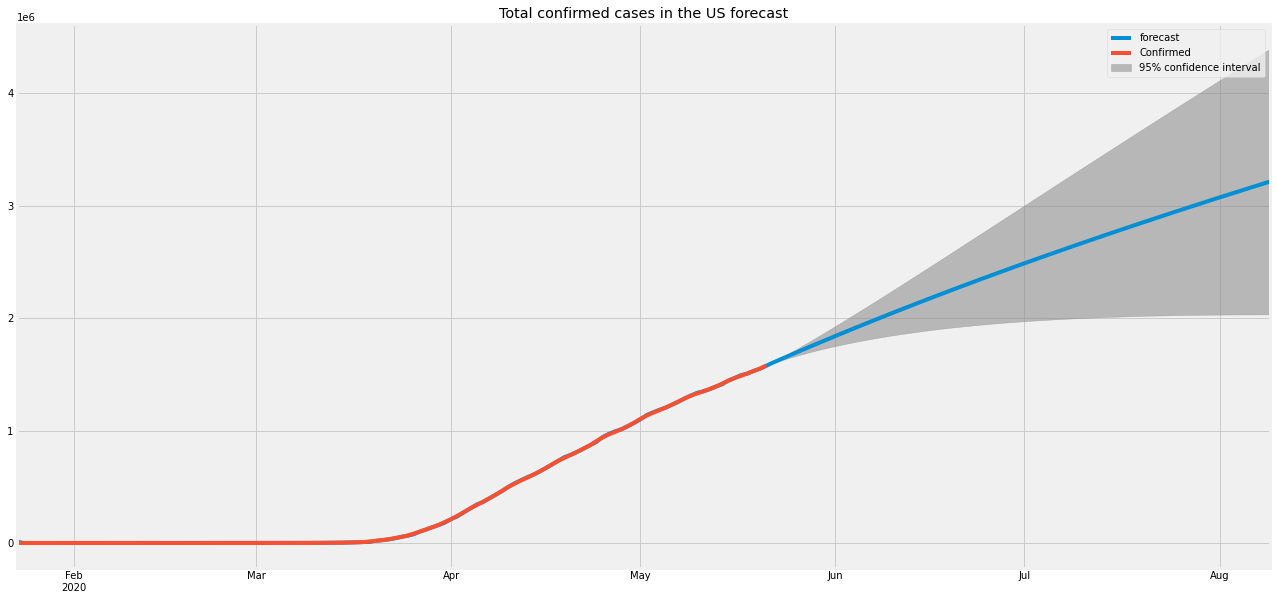

In [0]:
data5 = pd.DataFrame()
data5 = data[data['Country/Region'] == 'US'][['Confirmed', 'Date']]

data5['Date'] = pd.to_datetime(data5['Date'])
data5 = data5.set_index('Date')

model = ARIMA(data5, order=(2,1,2))
results = model.fit()
rcParams['figure.figsize'] = 20, 10
fig = results.plot_predict(1,200)
plt.title('Total confirmed cases in the US forecast')

Text(0.5, 1.0, 'Total recovered cases in the US forecast')

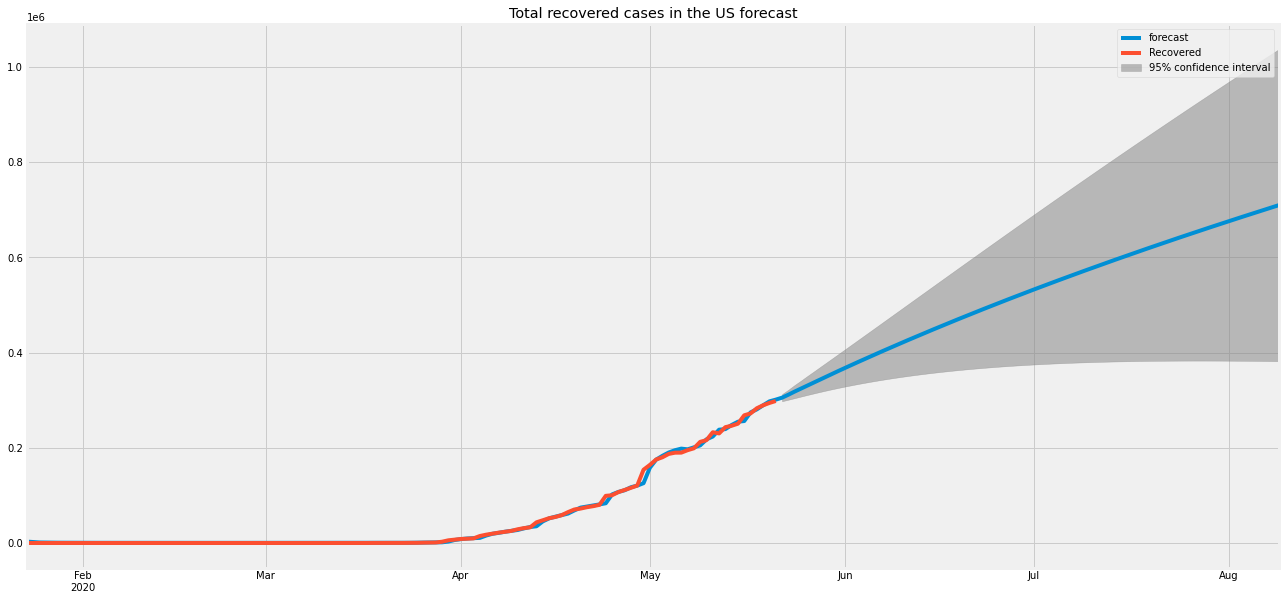

In [154]:
data5 = pd.DataFrame()
data5 = data[data['Country/Region'] == 'US'][['Recovered', 'Date']]

data5['Date'] = pd.to_datetime(data5['Date'])
data5 = data5.set_index('Date')

model = ARIMA(data5, order=(2,1,2))
results = model.fit()
rcParams['figure.figsize'] = 20, 10
fig = results.plot_predict(1,200)
plt.title('Total recovered cases in the US forecast')

Text(0.5, 1.0, 'Total deaths in the US forecast')

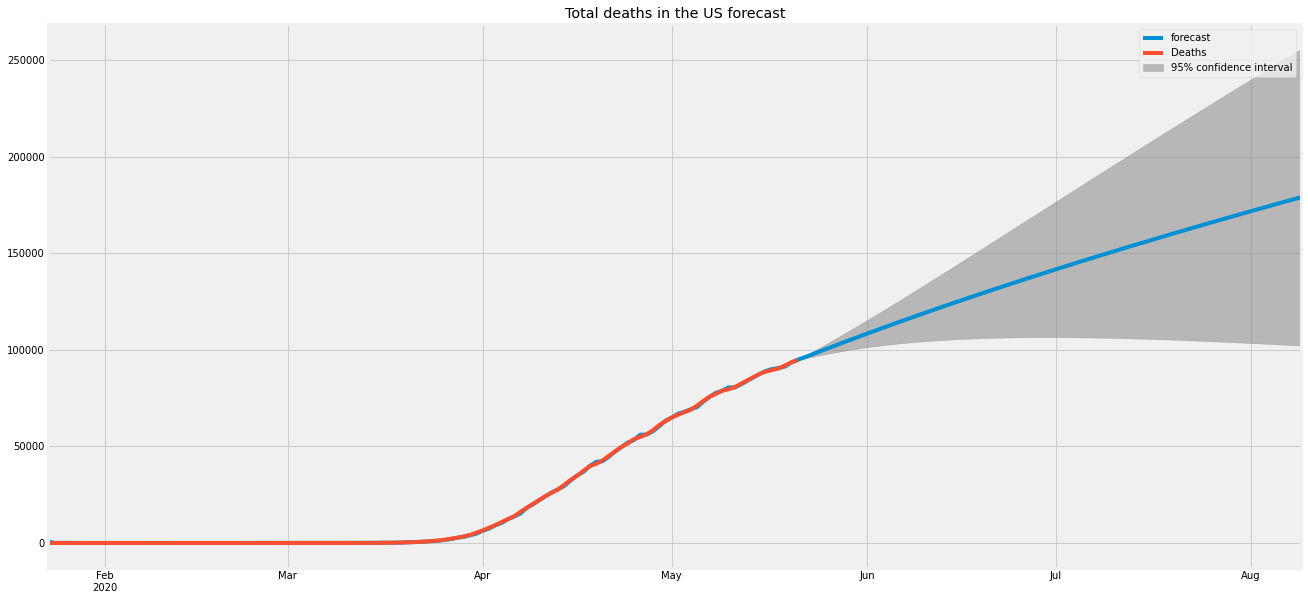

In [155]:
data5 = pd.DataFrame()
data5 = data[data['Country/Region'] == 'US'][['Deaths', 'Date']]

data5['Date'] = pd.to_datetime(data5['Date'])
data5 = data5.set_index('Date')

model = ARIMA(data5, order=(2,1,2))
results = model.fit()
rcParams['figure.figsize'] = 20, 10
fig = results.plot_predict(1,200)
plt.title('Total deaths in the US forecast')

### Using Neural network

In [0]:
data_y, data_x = prepare_data(data, "US")
model = create_model()

In [0]:
epochs = 6000
model.fit(data_x.reshape([len(data_x), 1]),data_y.reshape([len(data_x), 1]),epochs=epochs)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
121/121 [==============================] - 0s 146us/step - loss: 11378804397.4876 - accuracy: 0.0000e+00
Epoch 3502/6000
121/121 [==============================] - 0s 161us/step - loss: 11379002503.4050 - accuracy: 0.0000e+00
Epoch 3503/6000
121/121 [==============================] - 0s 215us/step - loss: 11367058643.5702 - accuracy: 0.0000e+00
Epoch 3504/6000
121/121 [==============================] - 0s 182us/step - loss: 11316872302.0165 - accuracy: 0.0000e+00
Epoch 3505/6000
121/121 [==============================] - 0s 146us/step - loss: 11301218312.4628 - accuracy: 0.0000e+00
Epoch 3506/6000
121/121 [==============================] - 0s 125us/step - loss: 11259620952.8595 - accuracy: 0.0000e+00
Epoch 3507/6000
121/121 [==============================] - 0s 152us/step - loss: 11239962869.4215 - accuracy: 0.0000e+00
Epoch 3508/6000
121/121 [==============================] - 0s 152us/step - loss: 1120655557

In [0]:
model.save('Confirmed_US.h5')
model = models.load_model("Confirmed_US.h5")

country_name = "US"

data3 = prepare_graph(data, data_y, model, country_name)

fig = go.Figure()
fig.add_trace(go.Scatter(x=data[data["Country/Region"]==country_name]["Date"], y=data[data["Country/Region"]==country_name]["Confirmed"],
                         mode='lines+markers',name='Total Cases in ' + country_name))

fig.add_trace(go.Scatter(x=data3['day'], y=data3['case'],
                         name="Prediction",
                        line=dict(color='rgb(220,21,22)',width=2, dash='dot')))

fig.update_layout(title_text="Confirmed cases prediction in the " + country_name + " for the next 7 days",plot_bgcolor='rgb(250, 242, 242)')
